<a href="https://colab.research.google.com/github/manalibhoir22/manali/blob/master/WORD_CLOUD_FINAL_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline


# Datetime
from datetime import datetime
# text preprocessing

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup

import unicodedata
tokenizer = ToktokTokenizer()

from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

df = pd.read_excel(r'C:\Users\Hp\Downloads\data.xlsx')
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,2,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,3,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,4,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,5,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [ ]:
df.drop(df.columns[[0,1,3,4,8]],axis=1,inplace=True)
df.head()

,asin,reviewText,overall,summary,reviewTime
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,"05 21, 2014"
1,120401325X,These stickers work like the review says they ...,5,Really great product.,"01 14, 2014"
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,"06 26, 2014"
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,"10 21, 2013"
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,"02 3, 2013"


In [ ]:
#Checking  Null Values in a dataset
df.isnull().sum()

asin           0
reviewText    99
overall        0
summary        1
reviewTime     0
dtype: int64

In [ ]:
#Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for i,asin,rv,ov,summ in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
    
    if type(summ)==str:
        if summ.isspace():
            blanks.append(i)
        
len(blanks)

ValueError: too many values to unpack (expected 5)

In [ ]:
# Droping Na's
df.dropna(inplace=True)

In [ ]:
# coverting review to string
df['reviewText']=df['reviewText'].apply(str)
df['summary']=df['summary'].apply(str)
df.head()

,asin,reviewText,overall,summary,reviewTime
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,"05 21, 2014"
1,120401325X,These stickers work like the review says they ...,5,Really great product.,"01 14, 2014"
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,"06 26, 2014"
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,"10 21, 2013"
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,"02 3, 2013"


In [ ]:
import string
import nltk 
from nltk.corpus import stopwords
from nltk import PorterStemmer
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
STOPWORDS = stopwords.words("english")

In [ ]:
def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"n\'t"," not",phrase)
    phrase=re.sub(r"\'re"," are",phrase)
    phrase=re.sub(r"\'s"," is",phrase)
    phrase=re.sub(r"\'d"," would",phrase)
    phrase=re.sub(r"\'ll"," will",phrase)    
    phrase=re.sub(r"\'t"," not",phrase)
    phrase=re.sub(r"\'ve"," have",phrase)
    phrase=re.sub(r"\'m"," am",phrase)
    return phrase

In [ ]:
def clean_text(text):
    PS = PorterStemmer()
    
    text = deEmojify(text) #remove Emojis
    
    text_cleaned = "".join([x for x in text if x not in string.punctuation]) #remove punctuation
    
    text_cleaned = re.sub(' +', ' ',text_cleaned) #remove extra spaces
    
    text_cleaned = text_cleaned.lower() #converting into lower case
    
    tokens = text_cleaned.split(" ")
    tokens = [token for token in tokens if token not in STOPWORDS] #taking only those words which are not stop words 
    
    text_cleaned = " ".join([PS.stem(token) for token in tokens])
    
    return text_cleaned

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

##STEMMING USING SNOWBALL
snow_stemmer = SnowballStemmer(language='english')

#LEMMATIZATION
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    
    snow_stemmer = SnowballStemmer(language='english')
    
    lemmatizer = WordNetLemmatizer()
    
    text = decontracted(text)
    
    text = deEmojify(text) #remove Emojis
    
    text_cleaned = "".join([x for x in text if x not in string.punctuation]) #remove punctuation
    
    text_cleaned = re.sub(' +', ' ',text_cleaned) #remove extra spaces
    
    text_cleaned = text_cleaned.lower() #converting into lower case
    
    tokens = text_cleaned.split(" ")
    
    tokens = [token for token in tokens if token not in STOPWORDS] #taking only those words which are not stop words 
    
    text_cleaned = " ".join([snow_stemmer.stem(token) for token in tokens])
    
    text_cleaned = " ".join([lemmatizer.lemmatize(token) for token in tokens])
    
    return text_cleaned
  

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['cleaned_summary']=df['summary'].apply(lambda x:clean_text(x))
df.head()

,asin,reviewText,overall,summary,reviewTime,cleaned_summary
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,"05 21, 2014",look good
1,120401325X,These stickers work like the review says they ...,5,Really great product.,"01 14, 2014",really great product
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,"06 26, 2014",love love love
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,"10 21, 2013",cute
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,"02 3, 2013",leopard home button sticker iphone 4


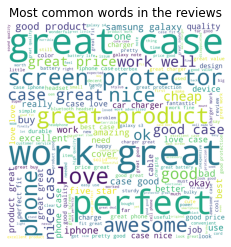

In [ ]:
#Generating a wordcloud to give a view of the words in the reviews based on their frequency of occurence
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_summary'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [ ]:
#Analyzing the sentiment of reviews using the library 'vader'
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
#Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score


In [ ]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [ ]:
df['sentiment_score']=df['summary'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [ ]:
df.sample(5)

,asin,reviewText,overall,summary,reviewTime,cleaned_summary,sentiment_score
79747,B007FHX9OK,Product was exactly as described and holds my ...,4,What I expected,"05 25, 2013",expected,0.0000
143715,B00AQA7RG4,The main reason I got this cable is so I could...,2,phone loses charge quicker than it receives wi...,"01 7, 2014",phone loses charge quicker receives cable,-0.3182
159002,B00CBSX5U6,It's fast. Nice camera quality. The resolution...,5,Nice equipment,"01 7, 2014",nice equipment,0.4215
72172,B006QRHZJK,This is hands down the best car mount you can ...,5,don't even bother looking at another phone mou...,"07 9, 2013",even bother looking another phone mount car,0.2584
161372,B00CJCKIXG,This is a great dashboard cradle to hold your ...,5,works on a variety of phones which means it ca...,"05 27, 2013",work variety phone mean stick even change phon...,0.4215


In [ ]:
# Defining a function to extract only the compound score.
def sentiment_category(score):
    if score >= 0:
        return "positive"
    elif score <= 0:
        return "negative"
    

In [ ]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [ ]:
df.sample(5)


,asin,reviewText,overall,summary,reviewTime,cleaned_summary,sentiment_score,review_category
183371,B00G6WDYPO,I got this to use on my Iphone 5. The removab...,5,Great protective case that isn't bulky!,"05 12, 2014",great protective case bulky,0.6588,positive
89749,B0085IDEBG,Charges even the power demanding smartphones i...,5,Quality product,"09 17, 2013",quality product,0.0000,positive
148972,B00BBN5MEY,"While this product does not claim to be OEM, t...",4,"Looks Awesome! Only one screw mount worked, ok...","01 30, 2014",look awesome one screw mount worked ok case,0.7345,positive
192228,B00J4TK4B8,"I used a galaxy S2 before i bought this phone,...",5,Amazing phone!,"05 16, 2014",amazing phone,0.6239,positive
151469,B00BO2OU90,"Easy enough to apply, if you follow the steps ...",5,Good bargin,"12 28, 2013",good bargin,0.4404,positive


Text(0.5, 1.0, 'Distribution of Reviews Category')

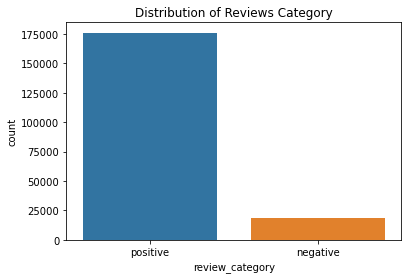

In [ ]:
#Plotting a distribution of the review categories
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [ ]:
# extracting all positive reviews and converting to a list
positive_reviews=df.loc[df['review_category']=='positive','cleaned_summary'].tolist() 
positive_reviews[0:5]

['look good',
 'really great product',
 'love love love',
 'cute',
 'leopard home button sticker iphone 4']

In [ ]:
# extracting all negative reviews and converting to a list
negative_reviews=df.loc[df['review_category']=='negative','cleaned_summary'].tolist() 
negative_reviews[0:5]

['good idea',
 'horrible',
 'solid charger rf noisy',
 'work fine died',
 'bad experience']

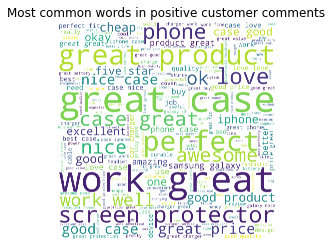

In [ ]:
#Generating wordclouds separately for positive reviews
from wordcloud import WordCloud
wordcloud = WordCloud(height=5000, width=5000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_summary'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

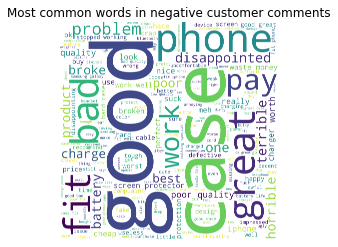

In [ ]:
#Generating wordclouds separately for  negative reviews
from wordcloud import WordCloud
wordcloud = WordCloud(height=5000, width=5000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_summary'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

In [ ]:
#Unigrams
##Unigrams are just individual words
from collections import Counter

In [ ]:
#Defining a function to get the most common words
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [ ]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [ ]:
top_20_positive_review_words

[('great', 31127),
 ('case', 21711),
 ('good', 16806),
 ('work', 12780),
 ('love', 9196),
 ('nice', 8683),
 ('product', 7511),
 ('phone', 7193),
 ('charger', 5742),
 ('price', 5596),
 ('perfect', 5311),
 ('best', 4987),
 ('fit', 4588),
 ('battery', 4442),
 ('iphone', 4404),
 ('screen', 4143),
 ('excellent', 4063),
 ('well', 3845),
 ('awesome', 3747),
 ('protector', 3669)]

In [ ]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [ ]:
top_20_negative_review_words

[('good', 1567),
 ('case', 1251),
 ('fit', 1144),
 ('great', 910),
 ('phone', 840),
 ('bad', 814),
 ('quality', 772),
 ('poor', 768),
 ('get', 672),
 ('work', 658),
 ('hard', 591),
 ('charge', 540),
 ('broke', 498),
 ('product', 493),
 ('pay', 483),
 ('battery', 451),
 ('like', 450),
 ('well', 419),
 ('problem', 406),
 ('', 402)]

In [ ]:
#Defining a function to produce a barplot of the most common words
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

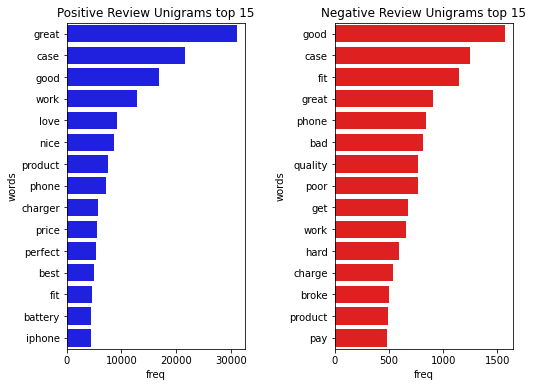

In [ ]:
#Using the above function, to produce barplots for positive and negative reviews separately
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,15,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,15,"Negative Review Unigrams",color="red",axis=ax[1])

In [ ]:
##A unigram will not give us a clear understanding as to what is the customer trying to tell. Hence, we use bigrams
##Bigrams are a combination of 2 words

##Defining a function to create n-grams. It can be a combination of 2,3,4 or more words. This number can be given as an input to the function argument.

In [ ]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [ ]:
#Creating bigrams for postive and negative reviews separately.
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [ ]:
positive_reviews_bigrams[:5]

['look_good',
 'really_great great_product',
 'love_love love_love',
 '',
 'leopard_home home_button button_sticker sticker_iphone iphone_4']

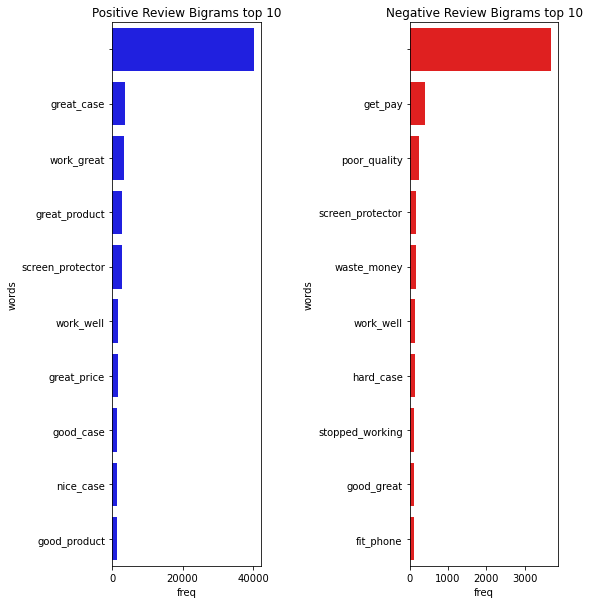

In [ ]:
rcParams['figure.figsize'] = 8,10
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,10,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,10,"Negative Review Bigrams",color="red",axis=ax[1])